Viral proteins are proteins generated by a virus. As viruses hijack much of their host's cellular machinery to support their life cycle, they encode very few of their own genes;

#### What is DNA?

DNA is the hereditary material in humans and almost all other organisms. Nearly every cell in a person’s body has the same DNA. Most DNA is located in the cell nucleus (where it is called nuclear DNA), but a small amount of DNA can also be found in the mitochondria (where it is called mitochondrial DNA or mtDNA)

The information in DNA is stored as a code made up of four chemical bases: adenine A, guanine G, cytosine C, and thymine T (figure below). The order, or sequence, of these bases determines the information available for building and maintaining an organism, similar to the way in which letters of the alphabet appear in a certain order to form words and sentences.

#### In this study, we will try to identify those viral proteins in the novel COVID-19 genome, the genome was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019. Comparative analysis of the COVID-19 viral proteins with the SARS, MERS and other bat coronaviruses proteins will be carried in this study

In [1]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

In [2]:
covid19 = SeqIO.read('MN908947.fna', 'fasta')

In [3]:
print('The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of', len(covid19) ,'genetic bases or letters.')

The genome of the virus causing Covid-19 (known as SARS-CoV-2) consists of 29903 genetic bases or letters.


As shown above, the covid-19 genome has 29903 genetic letters (sequence of A T C and G), to have an idea of how small it is, the human genome has more than 3 billion genetic letters. The small size of the viruses and microorganisms make them easier to study compared to the human genome.

In [4]:
#The code below shows the Covid-19's first 200 genetic letters (out of 29903 letters)
covid_DNA= covid19.seq
print( covid_DNA[:200])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGT


###### How do we extract information from this long sequence of letters?
This process is called gene expression

Gene expression is the process by which information from a gene is used in the synthesis of a functional gene product. These products are often proteins.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

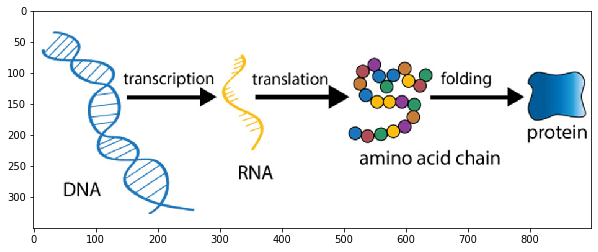

In [15]:
image = mpimg.imread('pic2.jpg')
fig1 = plt.figure(figsize = (10,5))
ax1 = fig1.add_subplot(111)
ax1.imshow(image, interpolation='none')
plt.show()

TRANSCRIPTION: DNA is copied out into a messenger RNA (mRNA)

TRANSLATION: mRNA is translated into amino acids

MINO ACID FOLDING: A sequence of 20 or more amino acids (the building blocks of proteins) form a protein.

### Transcription

Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make an RNA molecule.

Basically the mRNA is a copy of our DNA. However, in RNA, a base called uracil (U) replaces thymine (T) as the complementary nucleotide to adenine (that's the only difference, T is replaced by U).

In [16]:
covid_mRNA = covid_DNA.transcribe()
print(covid_mRNA[:100])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUC


In order to see the difference, we align the covid-19 DNA and mRNA sequences. We can see that the mRNA is an identical copy with the T base replaced by U

In [17]:
print('Covid-19 DNA:', covid_DNA[:50])
print('Covid-19 RNA:', covid_mRNA[:50])

Covid-19 DNA: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC
Covid-19 RNA: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUC


### Translation

Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of amino acids.

It is essentially a translation from one code (nucleotide A T C G sequence) to another code (amino acid sequence).

How does this translation happen? As in any language, we need a dictionary for translation, in this case the amino acid dictionary is the table below. The nucleotides are read in groups of three "AUG GCC CAG UUA ...". Each triplet is called a codon and codes for a specific amino acid.

There are 61 codons for 20 amino acids, and each of them is "read" to specify a certain amino acid out of the 20 commonly found in proteins.

One codon, AUG, specifies the amino acid methionine and also acts as a start codon to signal the start of protein construction.

There are three more codons that do not specify amino acids. These stop codons, UAA, UAG, and UGA, tell the cell when a polypeptide is complete. All together, this collection of codon-amino acid relationships is called the genetic code, because it lets cells “decode” an mRNA into a chain of amino acids.

1.Most codons specify an amino acid

2.Three “stop” codons mark the end of a protein

3.One “start” codon, AUG, marks the beginning of a protein and also encodes the amino acid methionine.

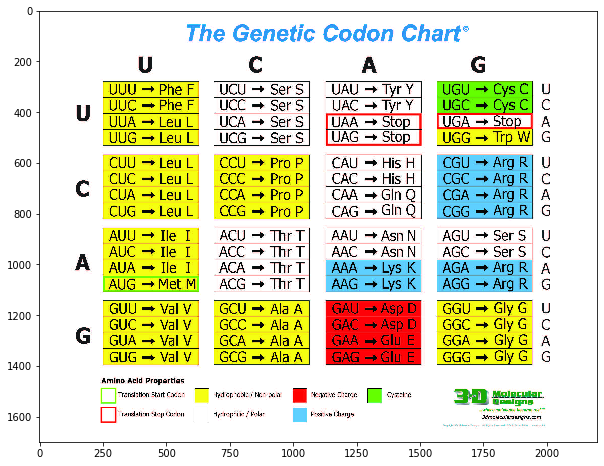

In [25]:
image = mpimg.imread('pic3.jpg')
fig1 = plt.figure(figsize = (10,10))
ax1 = fig1.add_subplot(111)
ax1.imshow(image, interpolation='none')
plt.show()

Luckily, with the translate() function, python does translate the mRNA to amino acids chains. Chains are separated with a * which is the stop codon ( UAA, UAG and UGA)

In [26]:
covid_aa = covid_mRNA.translate()
print(covid_aa[:99])

IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRE


C:\Users\ErandaniD\AppData\Local\Continuum\anaconda3\lib\site-packages\Bio\Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [27]:
print("Covid-19's genome has ",len(covid_aa),'amino acids')

Covid-19's genome has  9967 amino acids



The split() function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.

In [28]:
Proteins = covid_aa.split('*')
Proteins[:5]

[Seq('IKGLYLPR', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('QTNQLSISCRSVL', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('TNFKICVAVTRLHA', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('CTHAV', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('LITNYCR', HasStopCodon(ExtendedIUPACProtein(), '*'))]

In [29]:
print('We have', len(Proteins),'amino acid chains in the covid-19 genome')

We have 775 amino acid chains in the covid-19 genome


RECAP:
    
1- We started our analysis with the whole Covid-19 genome, that has 29903 nucleotides.

2- Transcribed the DNA or copied it out to an mRNA.

3- The mRNA was translated to 9967 amino acids.

4- The amino acid sequences were split at the stop codons.

5- We ended up with 775 amino acid chains.

It's worth to mention that not all the amino acids sequences are proteins. Only the sequences with more than 20 amino acids code for functional proteins. The short amino acid sequences are oligopeptides and have other functionalities. Here, we will focus on the chains with more than 20 amino acid chains: Proteins.

In [31]:
#filtered and keep just the proteins with more than 50 amino acids to have a shorter list of proteins to analyse
for i in Proteins[:]:
    if len(i) < 50:
        Proteins.remove(i)

In [32]:
print('We have ', len(Proteins), "proteins with  more than 50 amino acids in the covid-19 genome")

We have  5 proteins with  more than 50 amino acids in the covid-19 genome


In [34]:
import pandas as pd
import numpy as np

In [35]:
proteinas=pd.DataFrame(Proteins)
proteinas['amino acid sequence'] = proteinas[0].apply(str)
proteinas['Protein length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro= pro.sort_values(by=['Protein length'], ascending=False)

In [36]:
pro

,amino acid sequence,Protein length
0,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
1,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
4,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
2,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
3,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63


Now that we have the protein sequences, we will use the BLAST search.

BLAST (basic local alignment search tool) is an algorithm and program for comparing primary biological sequence information, such as the amino-acid sequences of proteins or the nucleotides of DNA and/or RNA sequences. A BLAST search enables a researcher to compare a subject protein or nucleotide sequence (called a query) with a library or database of sequences, and identify library sequences that resemble the query sequence above a certain threshold.

In other words, we will try to find the protein sequences already available in the databases that are the most similar to our protein sequences. (Hint: In this case, most probably the proteins that will have the highest similarity with our Covid-19 belong to the SARS coronavirus or Bat coronavirus).

PSI-BLAST webpage: https://www.ebi.ac.uk/Tools/sss/psiblast/

we will try to find the protein sequences already available in the databases that are the most similar to our protein sequences. (Hint: In this case, most probably the proteins that will have the highest similarity with our Covid-19 belong to the SARS coronavirus or Bat coronavirus).

In [59]:
import squiggle

In [78]:
series1 = squiggle.squiggle.transform(covid19, method='gates', bar=False)

In [84]:
df = pd.DataFrame(series1)

In [86]:
df1 = df.T

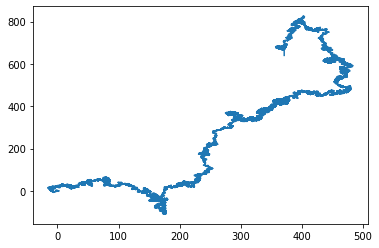

In [87]:
plt.plot(df1[0], df1[1])

In [88]:
covid19

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [89]:
for sequence in SeqIO.parse('MN908947.fna', "fasta"):
    print(sequence.id)

MN908947.3
